In [272]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

from nltk import word_tokenize,sent_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk import pos_tag

from nltk.stem import PorterStemmer,WordNetLemmatizer
import string


In [273]:
df=pd.read_csv('Data/spam.csv',encoding='latin-1')
df 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [274]:
if len(df.columns) > 2:
    df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [275]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [276]:
df.drop_duplicates(inplace=True,keep='first')

In [277]:
vals=df['Target'].value_counts()

([<matplotlib.patches.Wedge at 0x344a76f00>,
 [Text(1.0144997251399075, -0.4251944351600248, 'ham'),
  Text(-1.1067270163085225, 0.46384837110076776, 'spam')],
 [Text(0.5533634864399495, -0.2319242373600135, '87.37'),
  Text(-0.6455907595133047, 0.27057821647544783, '12.63')])

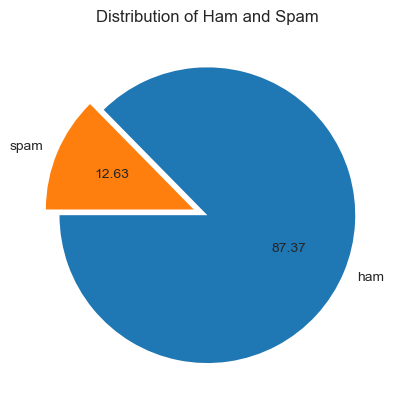

In [278]:
from matplotlib import pyplot as plt
plt.title("Distribution of Ham and Spam")
plt.pie(vals,labels=vals.index,autopct="%0.2f",startangle=180,explode=[0,0.1])

In [279]:
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [280]:
df['characters']=df['Message'].apply(len)

In [281]:
#df['words']=df['Message'].apply(lambda x:len(x.split(' '))), it won't be able to separate punctuations from words

df['words']=df['Message'].apply(lambda x:len(word_tokenize(x)))

In [282]:
df['sentences']=df['Message'].apply(lambda x:len(sent_tokenize(x)))

In [283]:
df

,Target,Message,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [284]:
new_df=df.groupby('Target')[['characters','words','sentences']].mean().reset_index()

new_df

,Target,characters,words,sentences
0,ham,70.459256,17.123782,1.820195
1,spam,137.891271,27.667688,2.970904


In [285]:
x=np.arange(len(new_df.columns[1:]))

ham=new_df.loc[new_df['Target']=='ham',new_df.columns[1:]].values.reshape(-1)
spam=new_df.loc[new_df['Target']=='spam',new_df.columns[1:]].values.reshape(-1)
width=0.35

ham.shape

(3,)

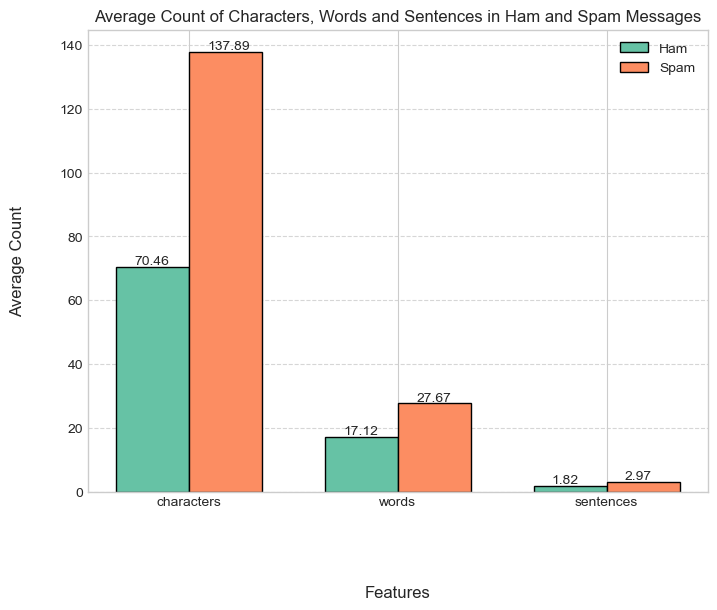

In [286]:
fig,ax=plt.subplots(figsize=(8,6))

plt.style.use('seaborn-v0_8-whitegrid')
palette = sns.color_palette("Set2", 2)

bar1=ax.bar(x-width/2,ham,width=width,label='Ham',edgecolor='black',linewidth=1,color=palette[0])
bar2=ax.bar(x+width/2,spam,width=width,label='Spam',edgecolor='black',linewidth=1,color=palette[1])

ax.set_xticks(x)
ax.set_xticklabels(new_df.columns[1:])
ax.set_xlabel('Features',labelpad=55,fontsize=12)
ax.set_ylabel('Average Count',labelpad=25,fontsize=12)
plt.title('Average Count of Characters, Words and Sentences in Ham and Spam Messages')


for val1,val2 in zip(bar1,bar2):
    h1=val1.get_height()
    h2=val2.get_height()
    ax.text(val1.get_x()+val1.get_width()/4,h1+0.8,str(np.round(h1,2)))
    ax.text(val2.get_x()+val2.get_width()/4,h2+0.8,str(np.round(h2,2)))

ax.grid(axis='y',alpha=0.8,linestyle='--')
    
plt.legend()

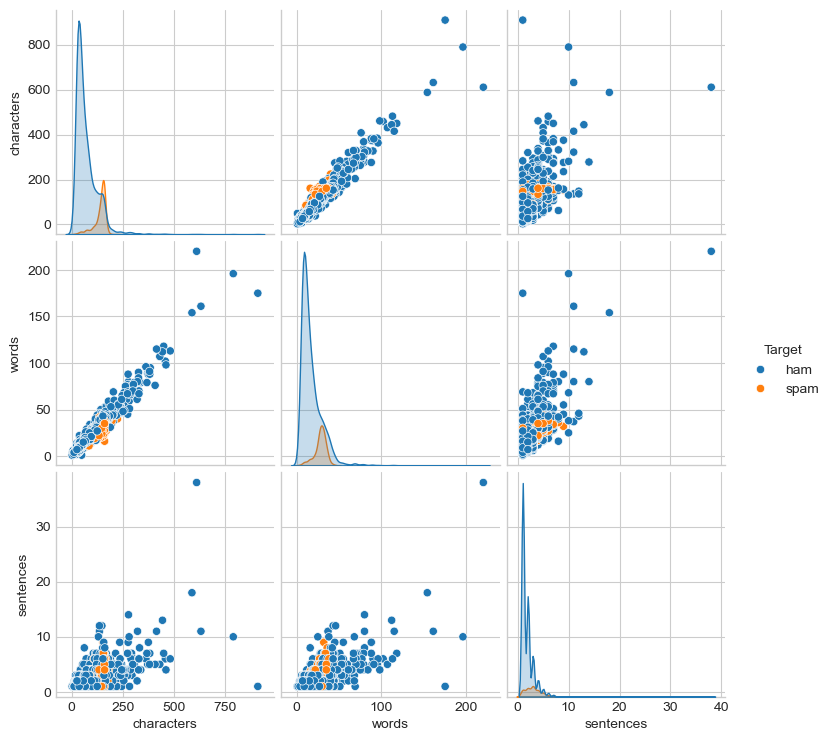

In [287]:
sns.pairplot(df,hue='Target')

In [288]:
encoder=LabelEncoder()

df['Target']=encoder.fit_transform(df['Target'])

<Axes: >

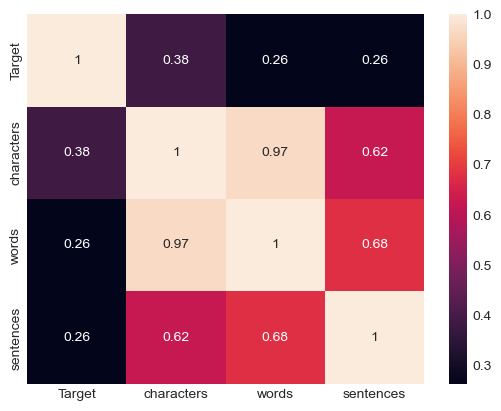

In [289]:
sns.heatmap(df.drop(columns='Message').corr(),annot=True)

In [290]:
def preprocessing_function(text):
    text=text.lower()
    tokens=word_tokenize(text)
    stemmer=WordNetLemmatizer()
    stopword=stopwords.words('english')

    res=[stemmer.lemmatize(token) for token in tokens if token not in stopword and token not in string.punctuation and len(token)>2]
    return ' '.join(res)
        
df['transformed']=df['Message'].apply(preprocessing_function)


# Creating a Wordcloud

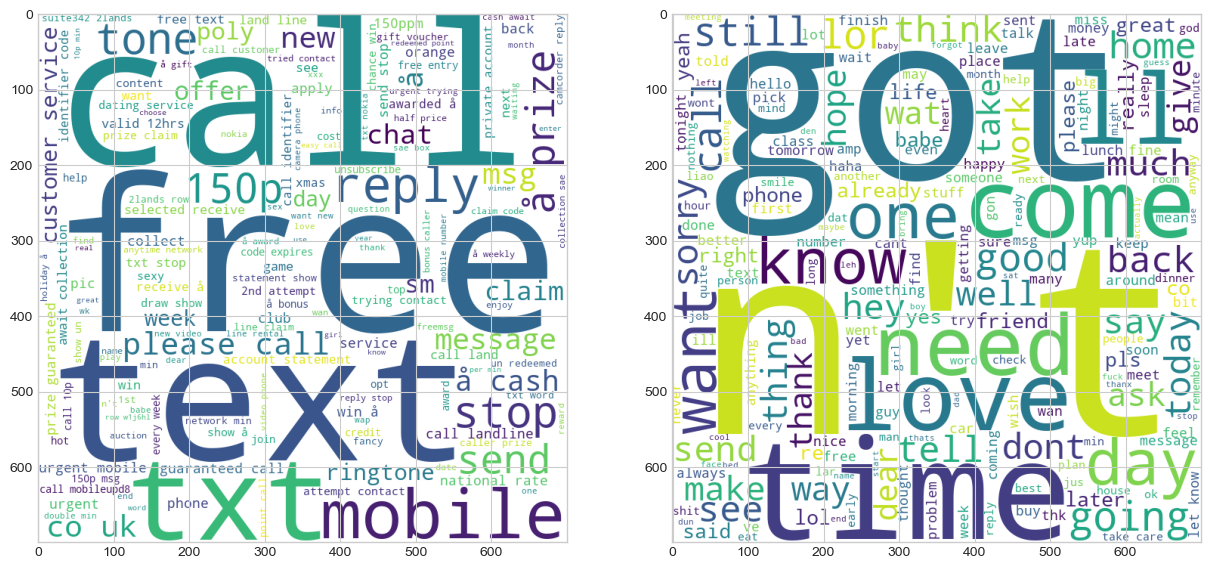

In [291]:
from wordcloud import WordCloud

wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['Target']==1]['transformed'].str.cat(sep=" "))

wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')
ham_wc=wc.generate(df[df['Target']==0]['transformed'].str.cat(sep=" "))

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(spam_wc)
ax[1].imshow(ham_wc)

# Finding most common 10 words in spam/ham category

In [292]:
from collections import Counter

spam_corpus=' '.join(df.loc[df['Target']==1]['transformed'])
ham_corpus=' '.join(df.loc[df['Target']==0]['transformed'])

most_common_spam_words=Counter(spam_corpus.split()).most_common(30)
most_common_ham_words=Counter(ham_corpus.split()).most_common(30)

In [293]:
pd.DataFrame(most_common_spam_words,columns=['Word','Frequency'])

,Word,Frequency
0,call,313
1,free,191
2,txt,130
3,text,121
4,mobile,114
5,stop,104
6,claim,98
7,reply,97
8,prize,82
9,get,70


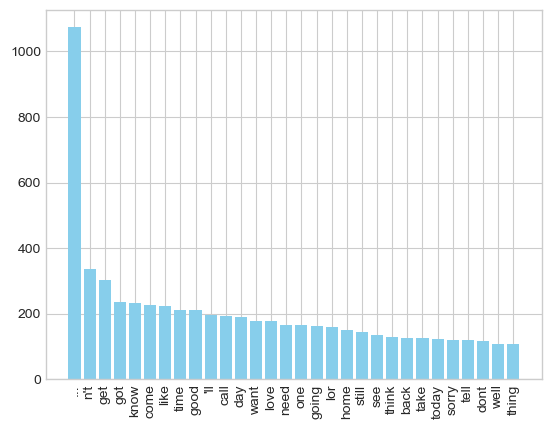

In [294]:
x=pd.DataFrame(most_common_ham_words,columns=['Word','Frequency'])
plt.bar(x['Word'],x['Frequency'],color='skyblue')

plt.xticks(rotation=90)
plt.show()

# Training model

Converting Transformed column into vectors

In [295]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [296]:
tfidf=TfidfVectorizer(max_features=5000)
X=pd.DataFrame(tfidf.fit_transform(df['transformed']).toarray(),columns=tfidf.get_feature_names_out())

df=df.reset_index(drop=True)

In [297]:
df=pd.concat([df,X],axis=1)

In [298]:
df.columns

Index(['Target', 'Message', 'characters', 'words', 'sentences', 'transformed',
       '00', '000', '008704050406', '02',
       ...
       'ì¼1', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry',
       'ûò'],
      dtype='object', length=5006)

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target','Message','transformed']), df['Target'], test_size=0.2, random_state=42)

In [301]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [302]:
df

,Target,Message,characters,words,sentences,transformed,00,000,008704050406,02,...,ì¼1,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy available bugis great world...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Ok lar... Joking wif u oni...,29,8,2,lar ... joking wif oni ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win cup final tkts 21st m...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say early hor ... already say ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think go usf life around though,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried contact å£750 pound prize claim...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,going esplanade home,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood ... suggestion,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
